<a href="https://colab.research.google.com/github/usm-cos422-522/courseMaterials/blob/main/Lectures/Covid_19_Web_scraping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import requests
page = requests.get("https://www.worldometers.info/coronavirus")

In [3]:
from bs4 import BeautifulSoup

In [4]:
#Instatiating the BeautifulSoup Class
soup = BeautifulSoup(page.content, 'lxml')
#Where soup is a variable containing the HTML of the webpage

In [6]:
#print(soup.prettify())

['html',
 '[if IE 8]> <html lang="en" class="ie8"> <![endif]',
 '[if IE 9]> <html lang="en" class="ie9"> <![endif]',
 '[if !IE]><!',
 <html lang="en">
 <!--<![endif]-->
 <head>
 <meta charset="utf-8"/>
 <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
 <meta content="width=device-width, initial-scale=1" name="viewport"/>
 <title>COVID Live - Coronavirus Statistics - Worldometer</title>
 <meta content="Live statistics and coronavirus news tracking the number of confirmed cases, recovered patients, tests, and death toll due to the COVID-19 coronavirus from Wuhan, China. Coronavirus counter with new cases, deaths, and number of tests per 1 Million population. Historical data and info. Daily charts, graphs, news and updates" name="description"/>
 <link href="/favicon/favicon.ico" rel="shortcut icon" type="image/x-icon"/>
 <link href="/favicon/apple-icon-57x57.png" rel="apple-touch-icon" sizes="57x57"/>
 <link href="/favicon/apple-icon-60x60.png" rel="apple-touch-icon" sizes="60x60"/>
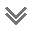

In [7]:
list(soup.children)

In [8]:
# Search for the table and extracting it
table = soup.find('table', attrs={'id': 'main_table_countries_today'})

In [9]:
rows = table.find_all("tr", attrs={"style": ""})

In [10]:
rows[2]

<tr style="">
<td style="font-size:12px;color: grey;text-align:center;vertical-align:middle;">1</td>
<td style="font-weight: bold; font-size:15px; text-align:left;"><a class="mt_a" href="country/us/">USA</a></td>
<td style="font-weight: bold; text-align:right">96,643,172</td>
<td style="font-weight: bold; text-align:right;"></td>
<td style="font-weight: bold; text-align:right;">1,072,978 </td>
<td style="font-weight: bold; 
                                    text-align:right;"></td>
<td style="font-weight: bold; text-align:right">92,602,975</td>
<td style="font-weight: bold; text-align:right;"></td>
<td style="text-align:right;font-weight:bold;">2,967,219</td>
<td style="font-weight: bold; text-align:right">3,635</td>
<td style="font-weight: bold; text-align:right"></td>
<td style="font-weight: bold; text-align:right"></td>
<td style="font-weight: bold; text-align:right">1,102,944,561</td>
<td style="font-weight: bold; text-align:right"></td>
<td style="font-weight: bold; text-align:r

In [11]:
rows[2].text

'\n1\nUSA\n96,643,172\n\n1,072,978 \n\n92,602,975\n\n2,967,219\n3,635\n\n\n1,102,944,561\n\n \nNorth America\n\n\n\n\n'

In [12]:
rows[2].text.strip().split("\n")

['1',
 'USA',
 '96,643,172',
 '',
 '1,072,978 ',
 '',
 '92,602,975',
 '',
 '2,967,219',
 '3,635',
 '',
 '',
 '1,102,944,561',
 '',
 ' ',
 'North America']

In [13]:
rows[2].text.strip().split("\n")[:12]

['1',
 'USA',
 '96,643,172',
 '',
 '1,072,978 ',
 '',
 '92,602,975',
 '',
 '2,967,219',
 '3,635',
 '',
 '']

In [14]:
data = []
for i,item in enumerate(rows):
    
    if i == 0:
        
        data.append(item.text.strip().split("\n")[:13])
        
    else:
        data.append(item.text.strip().split("\n")[:12])

In [16]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import pandas as pd

df = pd.DataFrame(data)
df = pd.DataFrame(data[1:], columns=data[0][:12]) #Formatting 

In [17]:
df.head()

,#,"Country,Other",TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop
0,World,"610,991,155","+351,562","6,505,881",+844,"588,555,718","+581,950","15,929,556","41,995","78,384",834.6,
1,1,USA,"96,643,172",,"1,072,978",,"92,602,975",,"2,967,219","3,635",,
2,2,India,"44,466,862",,"528,030",,"43,886,496",,"52,336",698,"31,548",375
3,3,France,"34,596,180",,"154,273",,"34,086,063",,"355,844",869,"527,482","2,352"
4,4,Brazil,"34,525,438",,"684,503",,"33,546,726",,"294,209","8,318","159,956","3,171"


In [18]:
df.to_csv('./Extracted_data.csv')

In [19]:
data[1:]

[['World',
  '610,991,155',
  '+351,562',
  '6,505,881',
  '+844',
  '588,555,718',
  '+581,950',
  '15,929,556',
  '41,995',
  '78,384',
  '834.6',
  ''],
 ['1',
  'USA',
  '96,643,172',
  '',
  '1,072,978 ',
  '',
  '92,602,975',
  '',
  '2,967,219',
  '3,635',
  '',
  ''],
 ['2',
  'India',
  '44,466,862',
  '',
  '528,030 ',
  '',
  '43,886,496',
  '',
  '52,336',
  '698',
  '31,548',
  '375'],
 ['3',
  'France',
  '34,596,180',
  '',
  '154,273 ',
  '',
  '34,086,063',
  '',
  '355,844',
  '869',
  '527,482',
  '2,352'],
 ['4',
  'Brazil',
  '34,525,438',
  '',
  '684,503 ',
  '',
  '33,546,726',
  '',
  '294,209',
  '8,318',
  '159,956',
  '3,171'],
 ['5',
  'Germany',
  '32,297,537',
  '',
  '147,861 ',
  '',
  '31,508,400',
  '+60,600',
  '641,276',
  '1,406',
  '382,826',
  '1,753'],
 ['6',
  'S. Korea',
  '23,706,477',
  '+99,737',
  '27,193 ',
  '+44',
  '21,972,888',
  '+138,685',
  '1,706,396',
  '536',
  '461,529',
  '529'],
 ['7',
  'UK',
  '23,521,792',
  '',
  '188,242